In [2]:
import cmocean.cm as cm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
def compare_stats(res_201905R, res_202111, metric):
    if np.abs(res_201905R[metric].values[0]) < np.abs(res_202111[metric].values[0]):
        return '201905R'
    elif np.abs(res_201905R[metric].values[0]) > np.abs(res_202111[metric].values[0]):
        return '202111'
    else:
        return 'same'

In [13]:
def compile_compare(res_201905R, res_202111, metric, regions):
    met_vec = []
    for region in regions:
        met_vec = met_vec + [compare_stats(res_201905R[res_201905R['region'] == region], res_202111[res_202111['region'] == region], metric)]
    return met_vec

In [191]:
def make_results_model(fall_file, winter_file, spring_file, summer_file):
    results_fall = pd.read_csv(fall_file)
    results_fall['season'] = 'fall'
    results_winter = pd.read_csv(winter_file)
    results_winter['season'] = 'winter'
    results_spring = pd.read_csv(spring_file)
    results_spring['season'] = 'spring'
    results_summer = pd.read_csv(summer_file)
    results_summer['season'] = 'summer'

    results_all = pd.concat([results_fall, results_winter, results_spring, results_summer], ignore_index=True)
    results_all = results_all.rename(columns={'Unnamed: 0': 'model'})
    # results_all = results_all[results_all['region'] == prod_region]
    results_201905R = results_all[results_all['model'] == '201905R']
    results_202111 = results_all[results_all['model'] == '202111']
    return results_201905R, results_202111

In [194]:
results_201905R, results_202111 = make_results_model('results_0_30_fall_noferry.csv', 'results_0_30_winter_noferry.csv', 'results_0_30_spring_noferry.csv', 'results_0_30_summer_noferry.csv')

In [117]:
prod_region = 'Nooksack'

color1 = '#4f8cf0'
color2 = '#162845'
color3 = '#345d9e'

color_spring = '#7ABB00'
color_summer = '#FFBF00'
color_fall = '#FF6F00'
color_winter = '#00C6C9'

In [118]:
# results_fall = pd.read_csv('results_0_30_fall_noferry.csv')
# results_fall['season'] = 'fall'
# results_winter = pd.read_csv('results_0_30_winter_noferry.csv')
# results_winter['season'] = 'winter'
# results_spring = pd.read_csv('results_0_30_spring_noferry.csv')
# results_spring['season'] = 'spring'
# results_summer = pd.read_csv('results_0_30_summer_noferry.csv')
# results_summer['season'] = 'summer'

In [119]:
# results_all = pd.concat([results_fall, results_winter, results_spring, results_summer], ignore_index=True)
# results_all = results_all.rename(columns={'Unnamed: 0': 'model'})
# results_all = results_all[results_all['region'] == prod_region]
# results_201905R = results_all[results_all['model'] == '201905R']
# results_202111 = results_all[results_all['model'] == '202111']

In [120]:
results_all_norm = results_all.copy()
results_all_norm['rmse'] = results_all['rmse']/results_all['rmse'].max()
results_all_norm['bias'] = results_all['bias']/results_all['bias'].max()
results_all_norm['crmse'] = results_all['crmse']/results_all['crmse'].max()
results_all_norm['swillmott'] = results_all['swillmott']/results_all['swillmott'].max()
results_all_norm['slopedev'] = results_all['slopedev']/results_all['slopedev'].max()
results_all_norm['const'] = results_all['const']/results_all['const'].max()
results_all_norm['systematic'] = results_all['systematic']/results_all['systematic'].max()
results_all_norm['nonsystematic'] = results_all['nonsystematic']/results_all['nonsystematic'].max()
results_all_norm['spread'] = results_all['spread']/results_all['spread'].max()
results_all_norm

results_norm_201905R = results_all_norm[results_all_norm['model'] == '201905R']
results_norm_202111 = results_all_norm[results_all_norm['model'] == '202111']

In [176]:
def split_into_seasons(results_model):
    results_model_radar = results_model[['season', 'rmse', 'crmse', 'swillmott', 'systematic', 'nonsystematic', 'spread']]  # remove spread from here because it goes negative
    # results_model_radar = results_model[['season', 'rmse', 'crmse', 'swillmott', 'systematic', 'nonsystematic']]  # remove spread from here because it goes negative
    categories = results_model_radar.loc[:, results_model_radar.columns != 'season'].columns.to_list()
    
    values_winter = results_model_radar[results_model_radar['season'] == 'winter'].values[0][1:]
    values_winter = np.append(values_winter, values_winter[0])
    values_spring = results_model_radar[results_model_radar['season'] == 'spring'].values[0][1:]
    values_spring = np.append(values_spring, values_spring[0])
    values_summer = results_model_radar[results_model_radar['season'] == 'summer'].values[0][1:]
    values_summer = np.append(values_summer, values_summer[0])
    values_fall = results_model_radar[results_model_radar['season'] == 'fall'].values[0][1:]
    values_fall = np.append(values_fall, values_fall[0])

    return categories, values_winter, values_summer, values_spring, values_fall

In [178]:
def norm_to_plot(categories, results_all):
    results_norm = results_all
    for cat in categories:
        results_norm[cat] = results_all[cat]/results_all[cat].max()
    
    results_201905R = results_norm[results_norm['model'] == '201905R']
    results_202111 = results_norm[results_norm['model'] == '202111']

    return results_201905R, results_202111

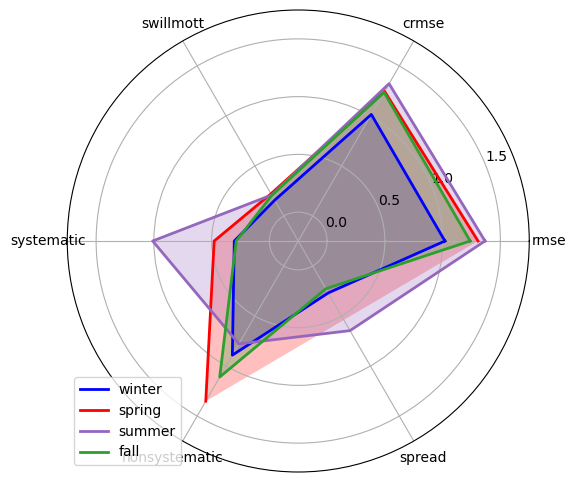

In [179]:
# set up data
categories, values_winter, values_summer, values_spring, values_fall = split_into_seasons(results_202111)

num_sets = 4

# make the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for i in range(num_sets):
    if i == 0:
        ax.fill(angles, values_winter, color='blue', alpha=0.25)
        ax.plot(angles, values_winter, color='blue', linewidth=2, label='winter')
    if i == 1:
        ax.fill(angles, values_spring, color='red', alpha=0.25)
        ax.plot(angles, values_spring, color='red', linewidth=2, label='spring')
    if i == 2:
        ax.fill(angles, values_summer, color='tab:purple', alpha=0.25)
        ax.plot(angles, values_summer, color='tab:purple', linewidth=2, label='summer')
    if i == 3:
        ax.fill(angles, values_fall, color='tab:green', alpha=0.25)
        ax.plot(angles, values_fall, color='tab:green', linewidth=2, label='fall')

# # add the text labels
# for i, (angle, value) in enumerate(zip(angles, values_winter)):
#     ax.text(angle, value, f'{round(value,2)}', ha='center', va='center')

# for i, (angle, value) in enumerate(zip(angles, values_spring)):
#     ax.text(angle, value, f'{round(value, 2)}', ha='center', va='center')

# for i, (angle, value) in enumerate(zip(angles, values_summer)):
#     ax.text(angle, value, f'{round(value, 2)}', ha='center', va='center')

# for i, (angle, value) in enumerate(zip(angles, values_fall)):
#     ax.text(angle, value, f'{round(value, 2)}', ha='center', va='center')

# labels and stuff
# ax.set_yticklabels([' '])  # Adjust labels as needed
ax.set_yticks([0, 0.5, 1.0, 1.5])
ax.set_ylim([-0.25, 1.75])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend()

plt.show()

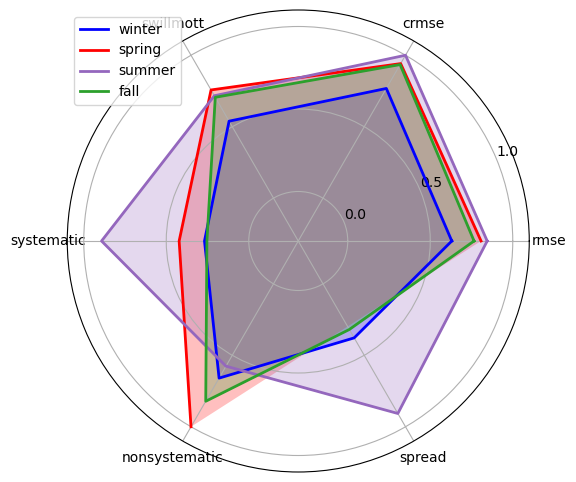

In [180]:
# set up data
categories, values_winter, values_summer, values_spring, values_fall = split_into_seasons(results_norm_202111)

num_sets = 4

# make the plot
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

for i in range(num_sets):
    if i == 0:
        ax.fill(angles, values_winter, color='blue', alpha=0.25)
        ax.plot(angles, values_winter, color='blue', linewidth=2, label='winter')
    if i == 1:
        ax.fill(angles, values_spring, color='red', alpha=0.25)
        ax.plot(angles, values_spring, color='red', linewidth=2, label='spring')
    if i == 2:
        ax.fill(angles, values_summer, color='tab:purple', alpha=0.25)
        ax.plot(angles, values_summer, color='tab:purple', linewidth=2, label='summer')
    if i == 3:
        ax.fill(angles, values_fall, color='tab:green', alpha=0.25)
        ax.plot(angles, values_fall, color='tab:green', linewidth=2, label='fall')

# # add the text labels
# for i, (angle, value) in enumerate(zip(angles, values_winter)):
#     ax.text(angle, value, f'{round(value,2)}', ha='center', va='center')

# for i, (angle, value) in enumerate(zip(angles, values_spring)):
#     ax.text(angle, value, f'{round(value, 2)}', ha='center', va='center')

# for i, (angle, value) in enumerate(zip(angles, values_summer)):
#     ax.text(angle, value, f'{round(value, 2)}', ha='center', va='center')

# for i, (angle, value) in enumerate(zip(angles, values_fall)):
#     ax.text(angle, value, f'{round(value, 2)}', ha='center', va='center')

# labels and stuff
# ax.set_yticklabels([' '])  # Adjust labels as needed
ax.set_yticks([0, 0.5, 1.0, 1.5])
ax.set_ylim([-0.3, 1.1])

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend()

plt.show()

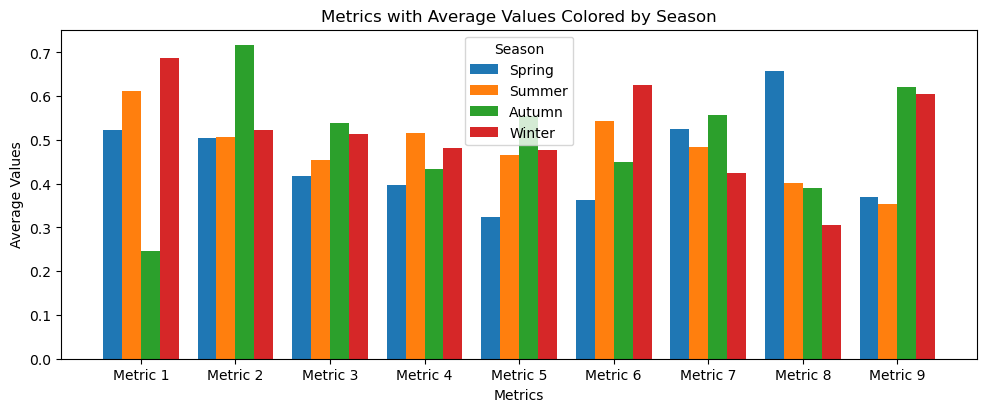

In [181]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data: 9 metrics, each with 8 data points, colored by season
metrics = ['Metric 1', 'Metric 2', 'Metric 3', 'Metric 4', 'Metric 5', 'Metric 6', 'Metric 7', 'Metric 8', 'Metric 9']
seasons = ['Spring', 'Summer', 'Autumn', 'Winter']

# Generate random data for each metric and season
data = np.random.rand(9, 8, 4)

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
fig.tight_layout(pad=1.5)

# Set the width of the bars
bar_width = 0.2
bar_positions = np.arange(len(metrics))

# Plot each metric with different colors for each season
for i, season in enumerate(seasons):
    ax.bar(bar_positions + i * bar_width - (bar_width * (len(seasons) - 1) / 2),
           data[:, :, i].mean(axis=1), width=bar_width, label=season)

# Set labels and title
ax.set_xlabel('Metrics')
ax.set_ylabel('Average Values')
ax.set_title('Metrics with Average Values Colored by Season')

# Set x-axis ticks and labels
ax.set_xticks(bar_positions)
ax.set_xticklabels(metrics)

# Add a legend
ax.legend(title='Season')

# Show the plot
plt.show()

<BarContainer object of 6 artists>

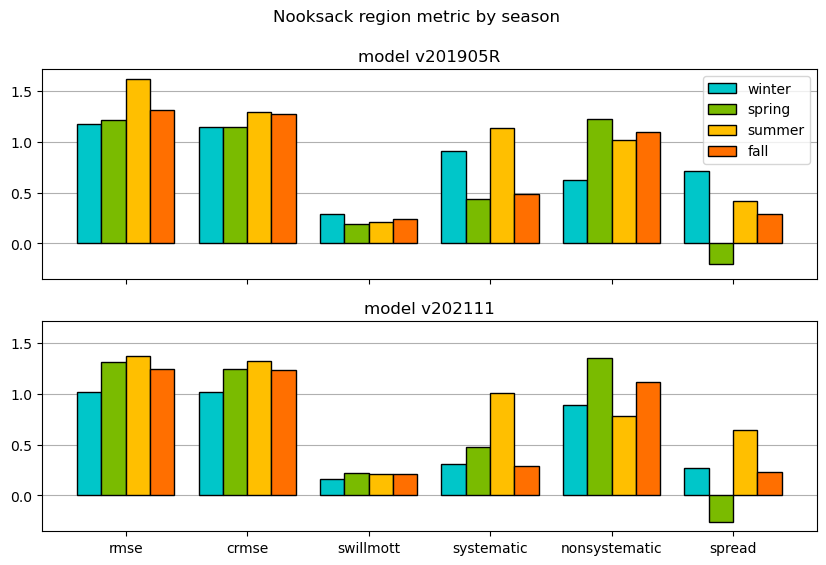

In [188]:
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True, sharey=True)
fig.suptitle('{} region metric by season'.format(prod_region))

bar_width = 0.2
x = np.arange(len(categories))

ax[0].set_title('model v201905R')
ax[0].grid(axis='y', zorder=0)
ax[0].bar(x - 1.5 * bar_width, results_201905R[results_201905R['season'] == 'winter'][categories].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
ax[0].bar(x - 0.5 * bar_width, results_201905R[results_201905R['season'] == 'spring'][categories].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
ax[0].bar(x + 0.5 * bar_width, results_201905R[results_201905R['season'] == 'summer'][categories].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
ax[0].bar(x + 1.5 * bar_width, results_201905R[results_201905R['season'] == 'fall'][categories].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)
ax[0].set_xticks(x, categories)
ax[0].legend(loc='upper right')

ax[1].set_title('model v202111')
ax[1].grid(axis='y', zorder=0)
ax[1].bar(x - 1.5 * bar_width, results_202111[results_202111['season'] == 'winter'][categories].values[0], label='winter', width=bar_width, edgecolor='k', color=color_winter, zorder=2)
ax[1].bar(x - 0.5 * bar_width, results_202111[results_202111['season'] == 'spring'][categories].values[0], label='spring', width=bar_width, edgecolor='k', color=color_spring, zorder=2)
ax[1].bar(x + 0.5 * bar_width, results_202111[results_202111['season'] == 'summer'][categories].values[0], label='summer', width=bar_width, edgecolor='k', color=color_summer, zorder=2)
ax[1].bar(x + 1.5 * bar_width, results_202111[results_202111['season'] == 'fall'][categories].values[0], label='fall', width=bar_width, edgecolor='k', color=color_fall, zorder=2)